In [1]:
import sys
# !{sys.executable} -m pip install geoip2 pandas matplotlib
import pandas as pd
import geoip2.database
database="/usr/local/var/GeoIP/GeoLite2-Country.mmdb"

## copy ip list from "fail2ban-client status sshd"
banned = "8.8.8.8 8.8.8.9"
df = pd.DataFrame([])
countries = []
ips = []

with geoip2.database.Reader("/usr/local/var/GeoIP/GeoLite2-Country.mmdb") as reader:
    for ip in banned.split():
        response = reader.country(ip)
        if 'en' in response.country.names:
            countries.append(response.country.names['en'])
            ips.append(ip)
        if 'en' not in response.country.names:
            countries.append('unknown')
            ips.append(ip)

df = pd.DataFrame({"country": countries,"ips":ips})
print ("Banned IP count: {}".format(len(banned.split())))


Banned IP count: 9585


<AxesSubplot:>

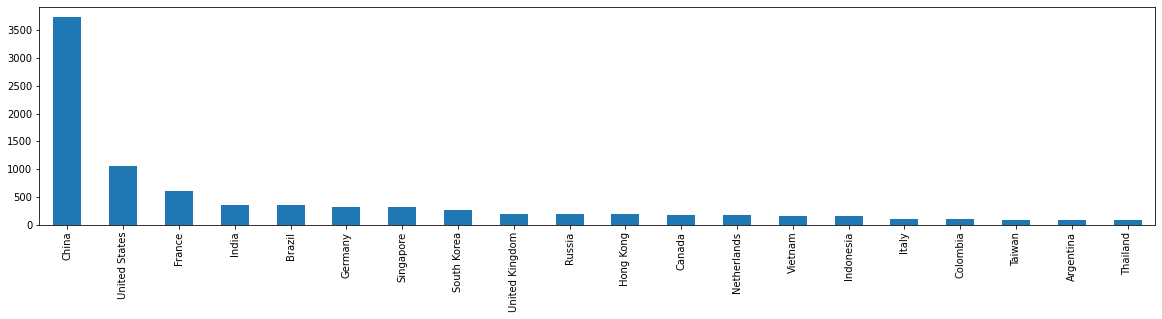

In [9]:
df['country'].value_counts().nlargest(20).plot.bar(figsize=(20,4),grid=False )